<a href="https://colab.research.google.com/github/linarahmatin/PCVK25_3F_30/blob/main/Week5_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Nama  : Sesy Tana Lina Rahmatin
#Kelas : TI 3F
#Nim   : 2341720029


#D-1 PERCOBAAN HISTOGRAM

In [1]:
from google.colab import drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

<BarContainer object of 256 artists>

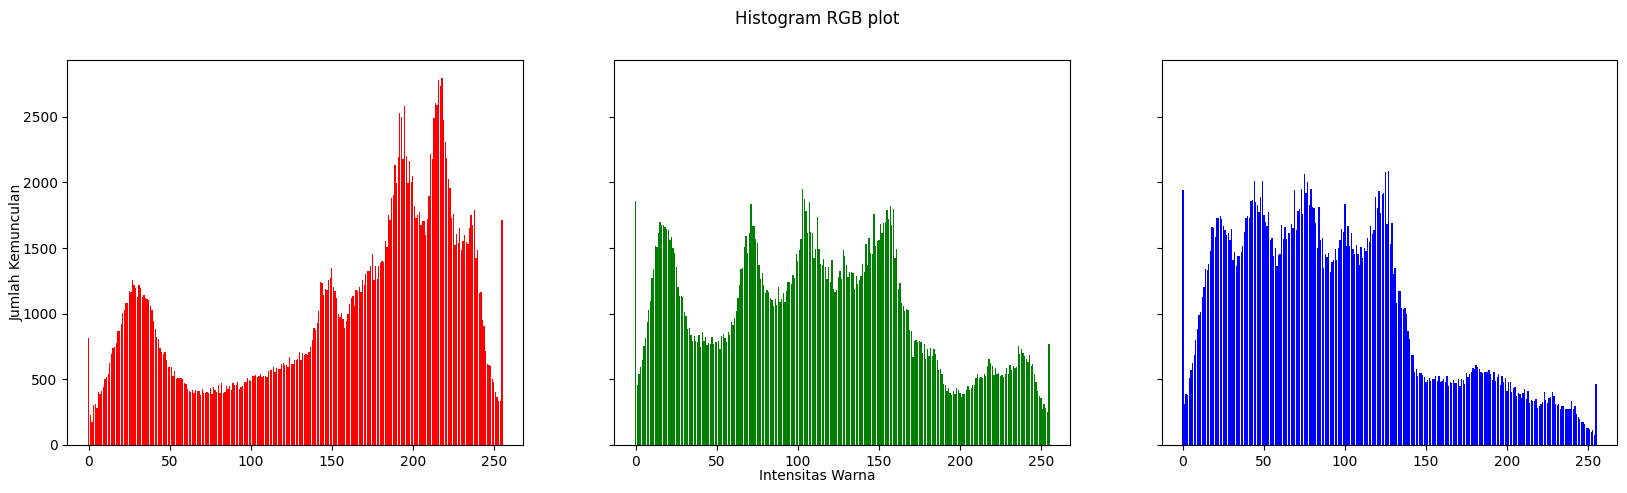

In [4]:
#membuat histogram image (manual)
img = cv.imread ('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_30/Gambar/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

height, width, depth = np.shape(img)
names = np.arange(256)


red = [0]*256
green = [0]*256
blue = [0]*256

for y in range(0,height) :
    for x in range(0,width) :
        red[img[y][x][0]] += 1
        green[img[y][x][1]] += 1
        blue[img[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=(20,5), sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
axs[0].set_ylabel('Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')